##### Muhamad Aditya Darmawan (PYTN-KS18-01)

# Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

- What is the change in the number of crime incidents from 2011 to 2016?
- What were the top 3 crimes per borough in 2016?

# Data Preprocessing

In [36]:
#Importing Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

In [38]:
# Memuat dataset
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
# Menampilkan beberapa baris awal data
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# Data Visulization

## Area PLot

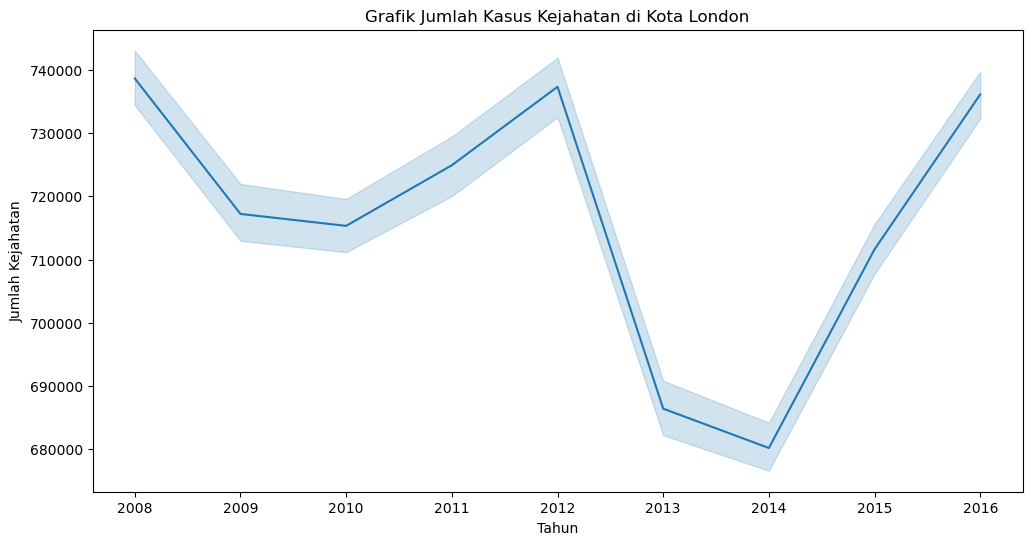

In [46]:
#Membuat sebuah diagram lineplot berdasarkan tahun dan value yang terdapat pada datase

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', data=df, estimator='sum')
plt.title('Grafik Jumlah Kasus Kejahatan di Kota London')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.show()

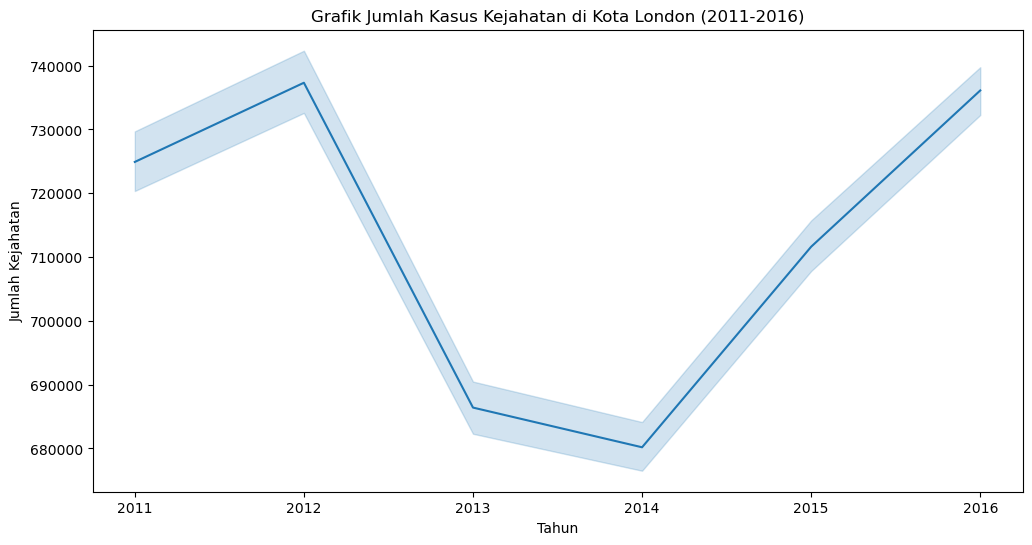

In [47]:
# Filter data hanya untuk tahun 2011 sampai 2016
filtered_df = df[(df['year'] >= 2011) & (df['year'] <= 2016)]

# Membuat ulang grafik plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', data=filtered_df, estimator='sum')
plt.title('Grafik Jumlah Kasus Kejahatan di Kota London (2011-2016)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.show()

Berdasarkan grafik lineplot di atas dapat dianalisis bahwa jumlah kasus kriminal di london rata rata bersifat dinamis dan titik rendah berada pada tahun 2014, namun pada tahun 2016 kasus kriminal kembali meningkat. 

## Histogram

In [42]:
# Mendeklarasikan data kriminal pada tahun 2013

hst1 = df[df['year'] <= 2013]
hst1

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


In [43]:
# Analisis data dalam bentuk tabel

hst1 = hst1.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
hst1['Total'] = hst1.sum(axis=1)
hst1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
hst1_highest = hst1.drop('Total', axis=1, inplace=True)
hst1_highest = hst1.head(n=3).transpose()
hst1_highest

borough,Westminster,Lambeth,Camden
year,,,
2008,47846,31717,32010
2009,48456,31225,31612
2010,48116,31671,31804
2011,54243,33224,33956
2012,59226,33473,31472
2013,53852,31868,28435


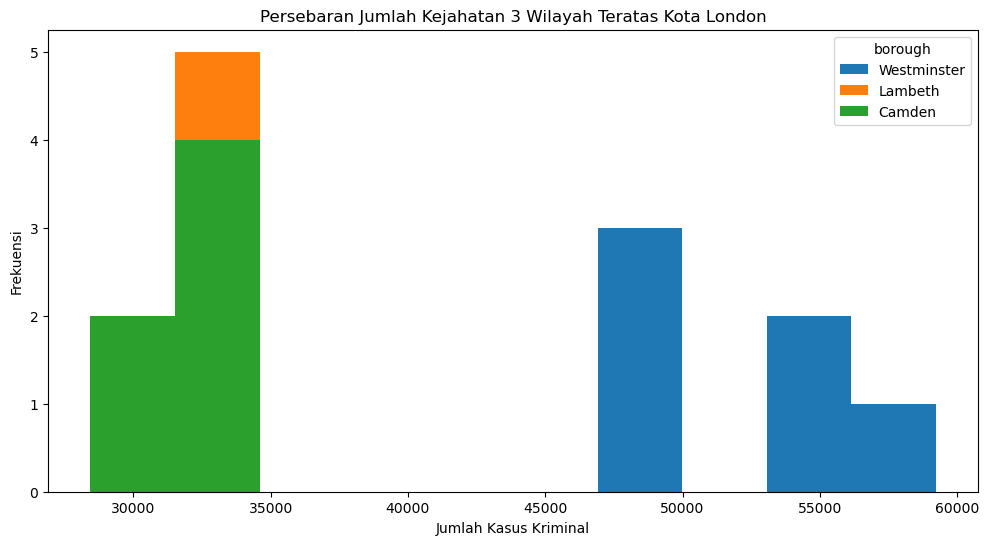

In [58]:
# Menampilkan histogram untuk 3 wilayah dengan kasus terbanyak
hst1_highest.plot(kind='hist', figsize=(12, 6))

plt.title('Persebaran Jumlah Kejahatan 3 Wilayah Teratas Kota London')
plt.ylabel('Frekuensi')
plt.xlabel('Jumlah Kasus Kriminal')
plt.show()

Pada grafik histogram diatas, daerah dengan kasus kriminal tertinggi berada di Westminter dan disusul oleh Lambeth serta Camden.

## Barchart

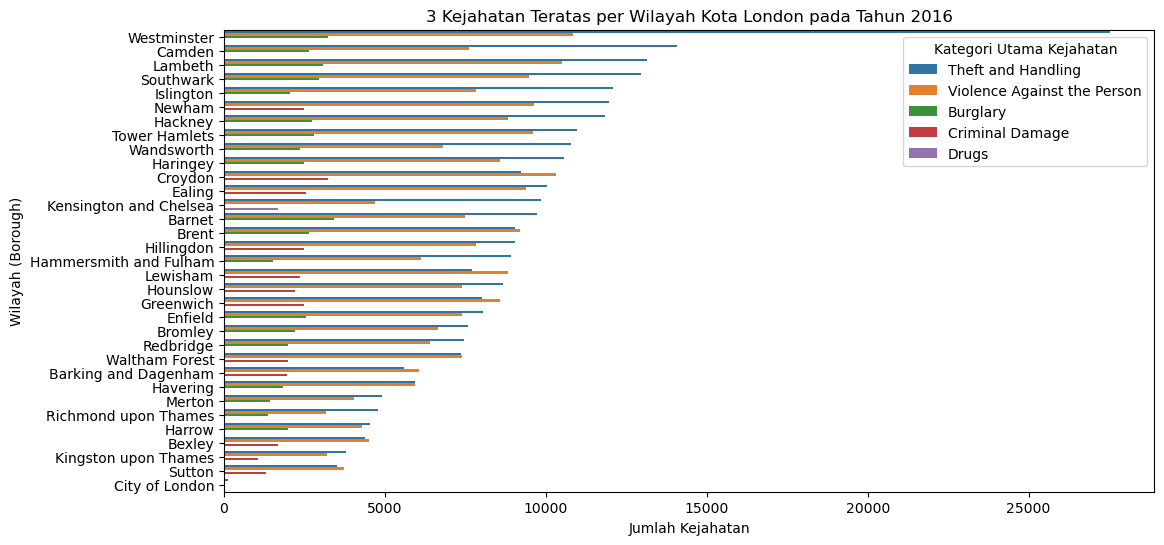

In [45]:
# Menampilkan kasus kriminal dalam grafik Bar Chart berdasarkan tahun dan wilayah

plt.figure(figsize=(12, 6))
top_crimes_2016 = df[df['year'] == 2016].groupby(['borough', 'major_category'])['value'].sum().reset_index()
top_crimes_2016 = top_crimes_2016.sort_values(by='value', ascending=False).groupby('borough').head(3)
sns.barplot(x='value', y='borough', hue='major_category', data=top_crimes_2016)
plt.title('3 Kejahatan Teratas per Wilayah Kota London pada Tahun 2016')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Wilayah (Borough)')
plt.legend(title='Kategori Utama Kejahatan', loc='upper right')
plt.show()

Pada grafik Bar Chart di atas dapat disimpulkan bahwa Westminter merupakan daerah dengan kasus kriminal tertinggi dan diikuti oleh Camden, Lambeth, Southwark, Newham, Hackney, Tower Hamlets, Handsworth, Haringey, dan Croydon sebagai 10 besar dari total kasus kriminal

## Pie Chart

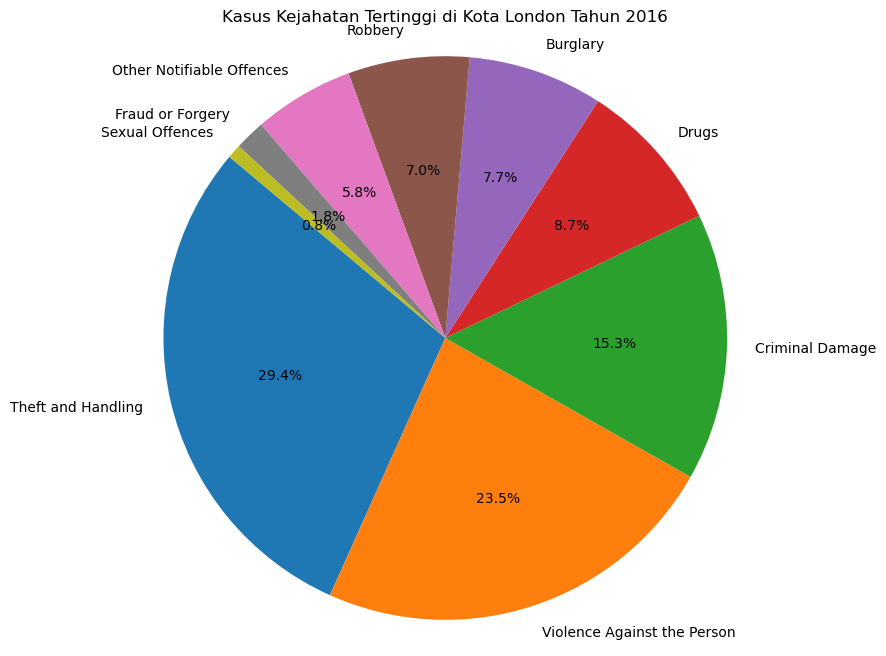

In [61]:
# Membuat Grafik PIe Chart untuk menganalisis jumlah kriminal berdasarkan kategori

plt.figure(figsize=(8, 8))
crime_categories = df[df['year'] == 2016]['major_category'].value_counts()
plt.pie(crime_categories, labels=crime_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Kasus Kejahatan Tertinggi di Kota London Tahun 2016')
plt.axis('equal')
plt.show()

Pada diagram Pie Chart di atas dapat dianalisis bahwa kasus kejahatan terbanyak yaitu kategori Thelft and Handling (Pencurian dan Pencopetan), diikuti dengan Criminal Damage (Kerusakan Barang atau Properti) dan Violence Against the Person (Kekerasan Terhadap Individu).

## Boxplot

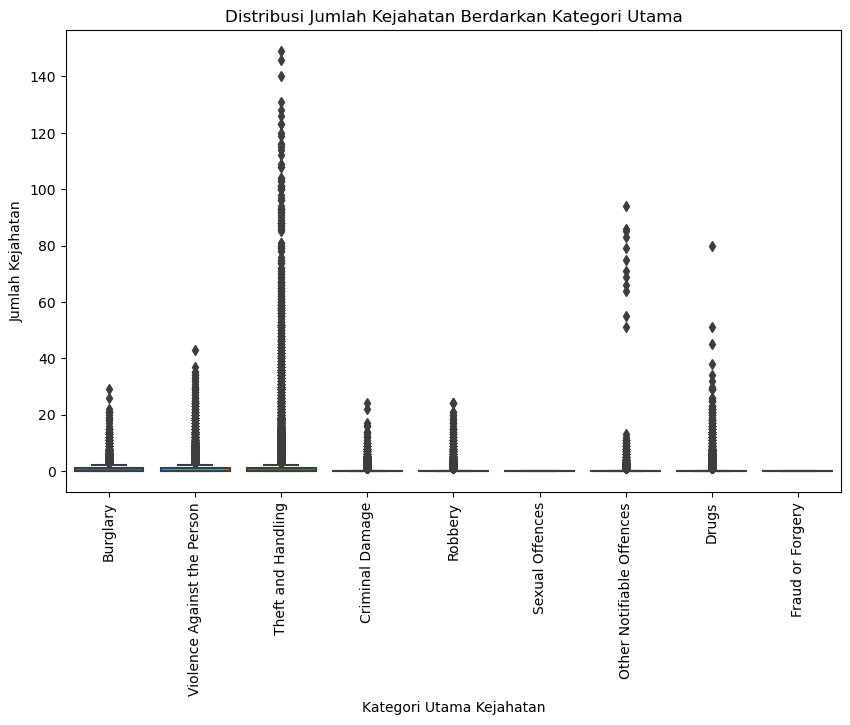

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='major_category', y='value', data=df[df['year'] == 2016])
plt.title('Distribusi Jumlah Kejahatan Berdarkan Kategori Utama')
plt.xlabel('Kategori Utama Kejahatan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.show()

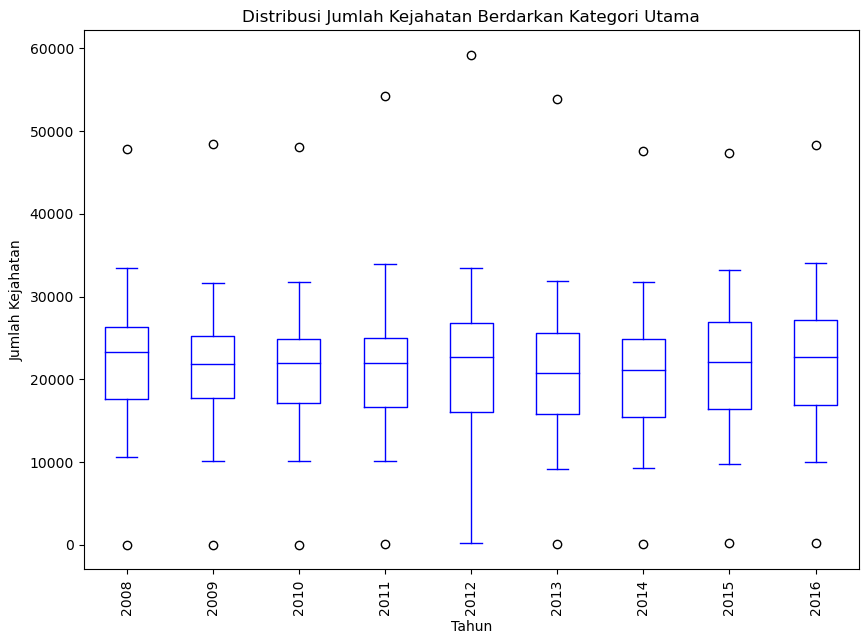

In [63]:
bp1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
bp1.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Distribusi Jumlah Kejahatan Berdarkan Kategori Utama')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.show()

Berdasarkan grafik di atas, kasus tindak pidana kriminal cenderung dinamis.

## Scatterplot

/tmp/ipykernel_6181/1053158927.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='value', y='month', data=df[df['year'] == 2016], palette='viridis')


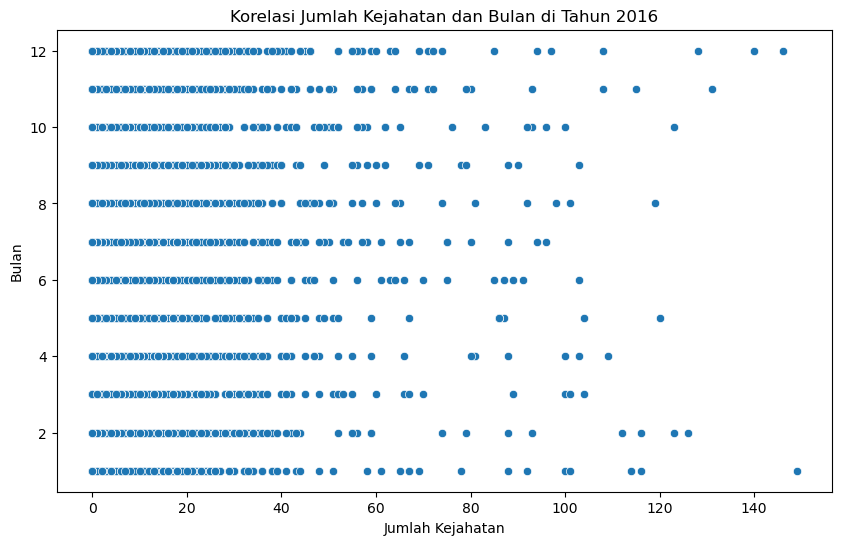

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='month', data=df[df['year'] == 2016], palette='viridis')
plt.title('Korelasi Jumlah Kejahatan dan Bulan di Tahun 2016')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Bulan')
plt.show()

/home/algo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


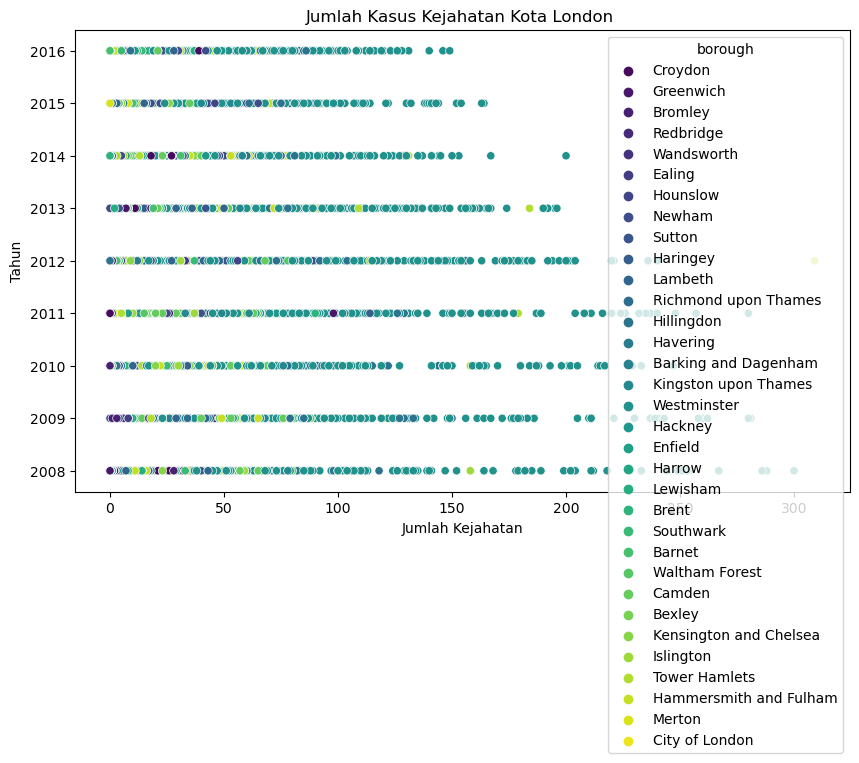

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='year', data=df, hue='borough', palette='viridis')
plt.title('Jumlah Kasus Kejahatan Kota London ')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Tahun')
plt.show()

Berdasarkan grafik scatter plot di atas, kasus tindak pidana kriminal cenderung dinamis dan masih sering terjadi.

## Word Clouds

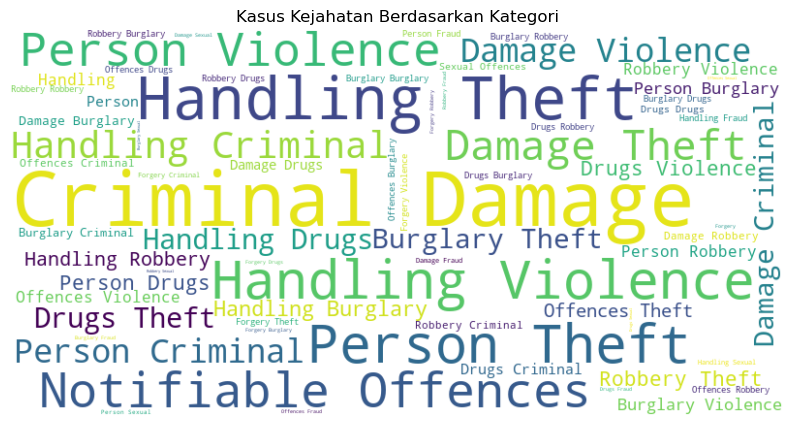

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['major_category']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Kasus Kejahatan Berdasarkan Kategori')
plt.axis('off')
plt.show()

Dari daftar Word clouds di atas, Kasus Criminal Damage, Handling, and Theft memiliki ukuran font yang paling besar, artinya kategori tersebut sering muncul dalam kasus pidana.

## Folium Maps

In [64]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=9)

world_map

In [69]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Toner')

world_map

In [68]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Terrain')

world_map

Visualisasi map di atas dengan menggunakan folium merupakan letak geografis kota London.

# Kesimpulan

- Jumlah kasus kejahatan yang terjadi di kota london dari tahun ke tahun termasuk pada rentan 2011 sampai 2016 cenderung dinamis naik turun dan pada tahun 2014 mulai menurun namun kembali naik sampai tahun 2016. 

- Wilayah dengan Kasus Kejahatan tertinggi berada di Westminter dan diikuti oleh Camden dan Lambeth.

- Adapun Kategori kriminal yang paling sering terjadi adalah Theft and Handling (Pencurian dan Pencopetan) yang diikuti oleh Criminal Damage (Kerusakan Barang atau Properti), dan Violence Against the Person (Kekerasan Terhadap Individu).